<center>
    <h1> ILI285 - Computación Científica I  / INF285 - Computación Científica </h1>
    <h2> Tarea 2 </h2>
    <h2> [S]cientific [C]omputing [T]eam </h2>
</center>

_Marzo 2017_

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Tabla de Contenidos
* [1.- Objetivos](#obj)
* [2.- Hints](#hints)
* [3.- Aritmética Punto Flotante](#aritmetica)
* [4.- Pérdida de Significancia](#perdida)
* [5.- Instrucciones](#instrucciones)

<div id='obj' />
# 1. Objetivos

<ul>
<li> Observar y aplicar conceptos de aritmética de punto flotante bajo el standard <i> IEEE 754 floating points. </i></li> http://ieeexplore.ieee.org/document/30711/
<li>Analizar y comprender el origen del fenómeno de pérdida de significancia y aplicar técnicas para contrarrestar este fenómeno.</li>
</ul>

<div id='obj' />
# 2. Hints

* _Markdown_ https://help.github.com/articles/basic-writing-and-formatting-syntax/
* _numpy_ http://www.numpy.org
* _scipy_ https://www.scipy.org/scipylib/index.html
* _ipywodgets_ https://github.com/ipython/ipywidgets
* _magic_ Use el siguiente magic: `%matplotlib inline`. http://nbviewer.jupyter.org/github/ipython/ipython/blob/1.x/examples/notebooks/Part%203%20-%20Plotting%20with%20Matplotlib.ipynb

<div id='aritmetica' />
<p style="font-size: 24px; line-height: 135%;}" ><b>3. Aritmética de Punto Flotante </b> </p>

<p style="font-size: 18px; line-height: 135%;}"> El estándar IEEE consiste en un set de representaciones binarias de numeros reales, en donde la precisión denominada <i> double precision</i> se estructuran de la siguiente forma: el <b>signo</b> ( + o - ) que ocupa 1 bit, una <b>mantisa</b> $b$ , que contiene un string the bits significantes, usando un total de 52 bits y el <b>exponente</b> $p$, que ocupa 11 bits. La representación normalizada de los números de punto flotante es la siguiente:

$$ \pm1.bbb...b \times 2^p$$

<p style="font-size: 18px; line-height: 135%;}">a)  Defina que corresponde el valor de <b>machine epsilon</b> $\epsilon_{mach}$ y explique porqué es posible obtener dicho valor en una computadora IEEE de doble precisión calculando el valor de la siguiente resta:</p>

$$\left(\frac{7.0}{3.0} - \frac{4.0}{3.0}\right) - 1.0 $$

<p style="font-size: 18px; line-height: 135%;}"> Implemente la resta usando variables de doble precisión y describa el procedimiento usando aritmética de doble precisión y Nearest Rounding Rule </p>



In [1]:
#Machine Epsilon
print((7.0/3.0 - 4.0/3.0 ) - 1.0)

2.220446049250313e-16


<p style="font-size: 18px; line-height: 135%;}"> b) Considere la serie geométrica:</p>

$$\sum_{i=0}^{\infty} r^i = \frac{1}{1-r}$$ 

<p style="font-size: 18px; line-height: 135%;}"> 
para $|r|<1$. Ahora considere el siguiente código.</p>

In [2]:
# Suma parcial de serie geométrica.
# Esta función realiza una suma parcial de la serie geométrica con M terminos, 
# pero detecta si es que los terminos que se están agregando aportan o no al
# resultado final. En caso de que los terminos ya no aporten, se detiene el loop
# y se retorna el valor obtenido y el índice en que se detuvo el loop.

def my_partial_geometric_series(r,M):
    sum_final=1.0
    sum_before=sum_final
    final_index=-1
    for i in np.arange(1,M):
        sum_before +=r**i
        if sum_final==sum_before:
            final_index=i-1
            break
        else:
            sum_final=sum_before
    # Se retorna el valor obtenido de la suma parcial y cuando se truncó
    # dado que no aportaba.
    return np.array([sum_final,final_index])

<p style="font-size: 18px; line-height: 135%;}"> Ahora para distintos valores de $r$ se han obtenido el número de terminos que efectivamente aportan al resultado final dado que se está utilizando _double precision_.</p>

In [7]:
N = 20
M = 1e8
r_all = np.logspace(-1,-20,N)
out_data = np.zeros((N,2))
for i in np.arange(N):
    out_data[i,:]=my_partial_geometric_series(r_all[i],M)


<p style="font-size: 18px; line-height: 135%;}">  Graficando la candidad de terminos significativos en _double precision_ versus el $r$. </p>

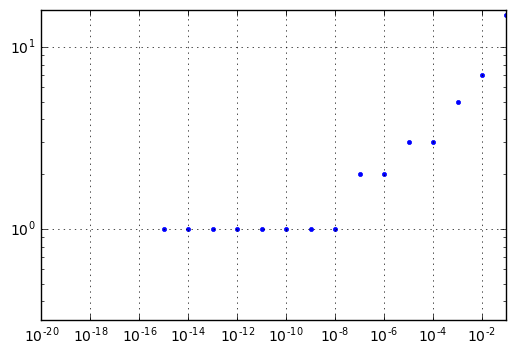

In [8]:
plt.figure()
plt.loglog(r_all,out_data[:,1],'.')
plt.grid(True)
plt.ylim([10**(-0.5),np.max(out_data[:,1])+1])
plt.show()

<p style="font-size: 18px; line-height: 135%;}">  Explique cláramente por qué a medida que disminuye $r$ disminuye la cantidad de terminos significativos obtenidos. </p>


<p style="font-size: 18px; line-height: 135%;}"> c) Explique la razón de por qué el loop indicado debe ejecutar el break. Utilice la función "to_binary" incluida en el jupyter notebook "03_floating_point_arithmetic" para entregar su justificación. Obtenga el menor valor de $X$ que ejecuta el break. </p>

In [ ]:
# Hint: Comenzando con X=1.0 se demorará mucho, piense primero, determine un buen X y luego ejecute el código.
X=1.0
a=X+0.0
b=X+1.0
while(True):
    a+=1.0
    b+=1.0
    if a == b:
        print('They are equal! Why?')
        break

<div id='perdida' />
<p style="font-size: 24px; line-height: 135%;}" ><b>4. Perdida de Significancia </b> </p>

<p style="font-size: 18px; line-height: 135%;}">La <b>Pérdida de Significancia </b> ocurre cuando en un cálculo numérico muchos dígitos relevantes se cancelan, dada la aritmética de punto flotante finita ocupada por los computadores. Cuando un número es restado por otro número considerablemente parecido, efectos indeseados ocurren tales como la cancelación  y reducción de dígitos.  </p>

<p style="font-size: 18px" > 1. Dada la función: </p>

$$f(x) = \frac{1 - x}{ 1 + x} - \frac{1}{3x+1}$$

<p>a) Grafique la función usando $x \in {[-10,10]}$ ¿Para que valores de x la función queda reducida a $0$ ?</p>
<p>b) Usando $x = [10^{-1} , 10^{-2} , ... , 10^{-20}] $ , calcule los valores de f(x) ¿Que ocurre con los valores observados? ¿En que momento ocurre pérdida de significancia? Describa el origen de cancelación de digítos. </p>  
<p>c) Reescriba la función original para evitar el proceso de pérdida de significancia (hint: busqué un denominador común para ambas fracciones.) </p> 
<p> d) Analice la diferencia entre los resultados de la función $f(x)$ con la función reescrita en la pregunta anterior. Realice un gráfico que mida la diferencia entre los resultados del punto a) y c). Realice un análisis cualitativo y cuantitativo de los resultados.

<p style="font-size: 18px" > 2. Para la siguiente función: </p>

$$g(x) = \frac{1 - \sec(x)}{\tan(x)^2} $$

<p>a) Usando $x = [-2\pi, 2\pi ]$ observe el comportamiento de la función. </p>

<p>b) Usando el intervalo $x = [-2\pi, 2\pi ] $ , calcule los valores de f(x) ¿Que ocurre con los valores observados? ¿En que momento ocurre pérdida de significancia? Describa el origen de cancelación de digítos. </p> 
<p>c) Reescriba la función original para evitar el proceso de pérdida de significancia (hint: implemente propiedades trigonométricas). </p> 
<p> d) Analice la diferencia entre los resultados de la función $g(x)$ con la función reescrita en la pregunta anterior. Realice un gráfico que mida la diferencia entre los resultados del punto a) y c). Realice un análisis cualitativo y cuantitativo de los resultados.

<div id='instr' />
# 5. Instrucciones:
 
 
* La estructura del laboratorio es la siguiente:
     1. Título, nombre de estudiante, email y rol.
     2. Introducción.
     3. Desarrollo y análisis de resultados.
     4. Conclusiones.
     5. Referencias.
* El laboratorio debe ser realizado en `Jupyter` notebook (`Python3`).
* Se evaluará la correcta utilización de librerias `NumPy`, `SciPy`, `SymPy`, `Matplotlib` y `ipywidgets`, así como la correcta implementación de algoritmos vectorizados cuando se indique.
* El archivo de entrega debe denominarse Tarea2-rol.tar.gz, y debe contener un directorio con todos los archivos necesarios para ejecutar el notebook, junto con un archivo README indicando explícitamente las librerías o módulos utilizados.
* El descuento por día de atraso será de $30$ puntos, con un máximo de 1 día de atraso. No se recibirán entregas después de este día.
* El trabajo es personal, no se permite compartir código, aunque sí se sugiere discutir aspectos generales con sus compañeros. En caso de sospecha de copia, se citará a los involucrados a defender sus conocimientos de manera presencial, evaluación cuya nota reemplazará la obtenida en la tarea.
* El no seguir estas instrucciones, implica descuentos en su nota obtenida.